In [39]:
import pandas as pd
from matplotlib import pyplot as plt

In [43]:
# Step 1: Read the CSV file
df = pd.read_csv('input.csv',delimiter=';')

# Initialize a dictionary to store state durations
state_durations = {}

In [44]:
# Iterate over the rows
for index, row in df.iterrows():
    timestamp = pd.to_datetime(row['timestamp'])
    state = row['STATE']
    
    # Calculate time difference
    if state not in state_durations:
        state_durations[state] = pd.Timedelta(0)
    else:
        state_durations[state] += timestamp - prev_timestamp
    
    prev_timestamp = timestamp

# Convert state durations to hours and minutes
for state in state_durations:
    hours = state_durations[state].seconds // 3600
    minutes = (state_durations[state].seconds % 3600) // 60
    state_durations[state] = f"{hours} hours {minutes} minutes"

# Sort the state durations by state name
state_durations = dict(sorted(state_durations.items()))

State P1: 1 hours 21 minutes
State P2: 0 hours 6 minutes
State P3: 1 hours 59 minutes
State P4: 16 hours 12 minutes
State P5: 2 hours 46 minutes


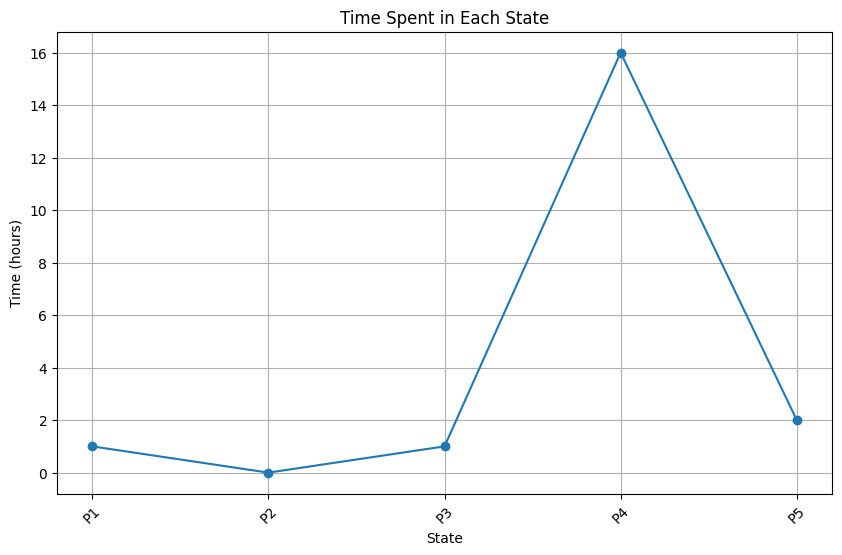

In [62]:
# Step 3: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(state_durations.keys(), [int(d.split()[0]) for d in state_durations.values()], marker='o')
plt.xlabel('State')
plt.ylabel('Time (hours)')
plt.title('Time Spent in Each State')
plt.xticks(rotation=45)
plt.grid(True)

# Print the exact amount of time for each state
for state,hours in state_durations.items():
    print(f"State {state}: {hours}")

plt.show()

In [61]:
GT = 5000  # Replace with the desired value

# Initialize variables for state prices
P3_price = 0
P5_price = 0

# Iterate over state durations to calculate prices
for state, duration in state_durations.items():
    hours = int(duration.split()[0])
    print(f"State {state}: {hours} hours")

    # Calculation formula
    if state == 'P3':
        P3_price = ((GT * 2) + 1_000_000) * hours

    if state == 'P5':
        P5_price = ((GT * 2) + 1_000_000) * hours

# Calculate total price
total_price = P3_price + P5_price

# Print the separated zeroes in the total price
formatted_total_price = "{:,.0f}".format(total_price)
print(f'Total Price: Rp. {formatted_total_price}')


State P1: 1 hours
State P2: 0 hours
State P3: 1 hours
State P4: 16 hours
State P5: 2 hours
Total Price: Rp. 3,030,000
